In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from sectorizedradialprofile.calculate_radial_profile import CalculateRadialProfile
import matplotlib.pyplot as plt
from skimage import io

In [2]:
%matplotlib notebook

Load the data

In [3]:
data_2d_1 = io.imread('data2d_for_test_1.tif')
data_2d_2 = io.imread('data2d_for_test_2.tif')
print(data_2d_1.shape)
print(data_2d_2.shape)

(194, 192)
(194, 192)


Visualize data

<IPython.core.display.Javascript object>


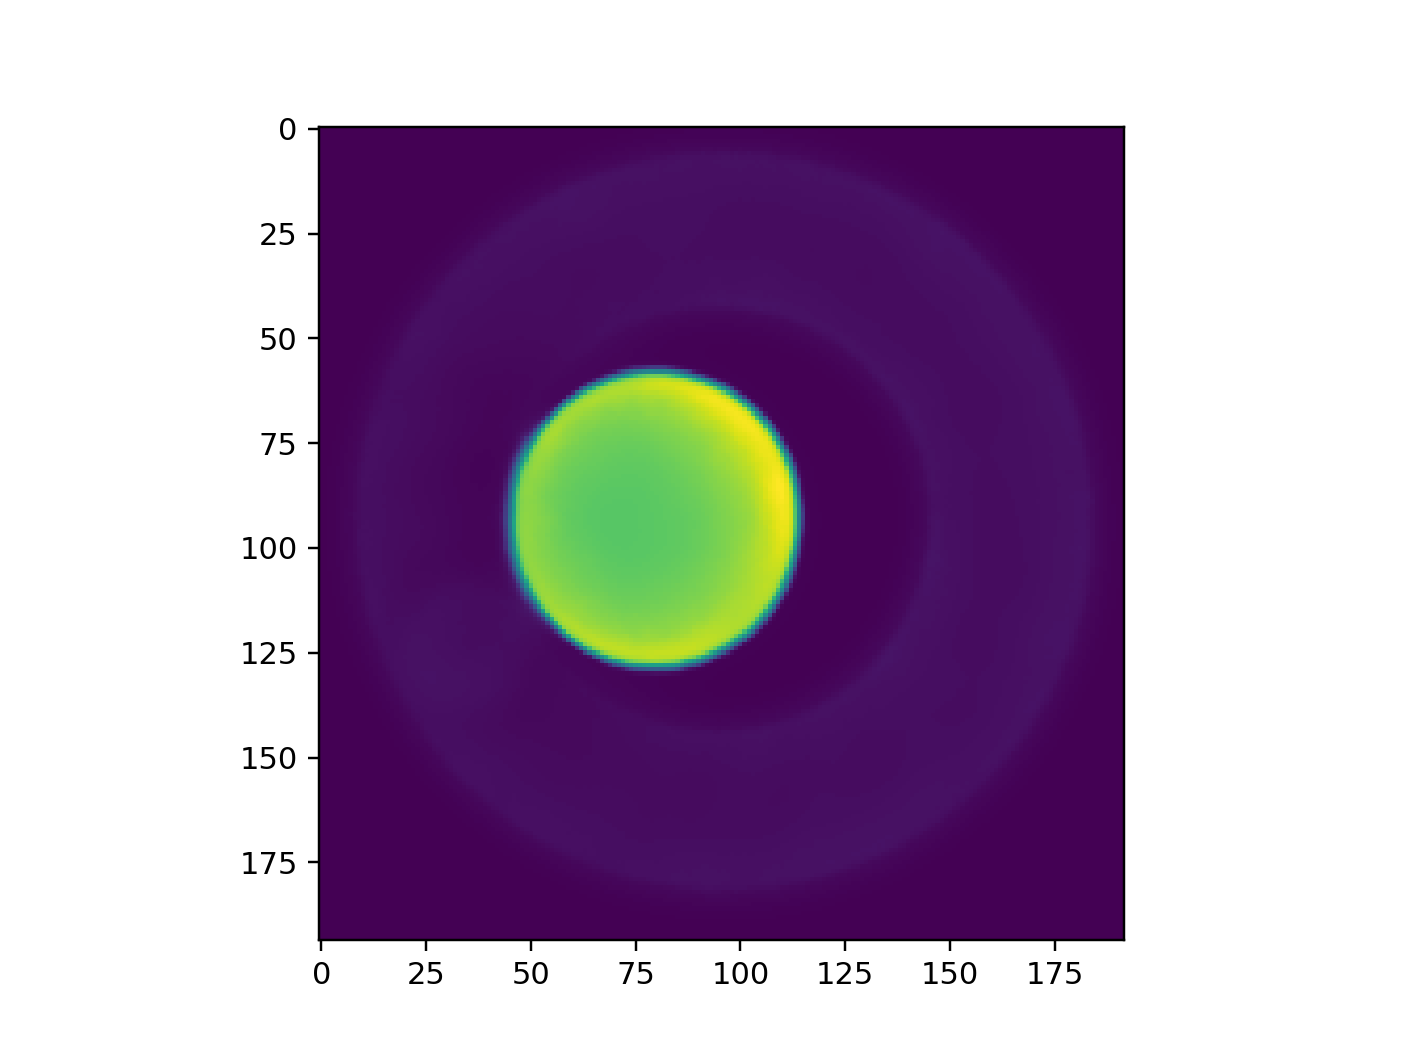

<IPython.core.display.Javascript object>


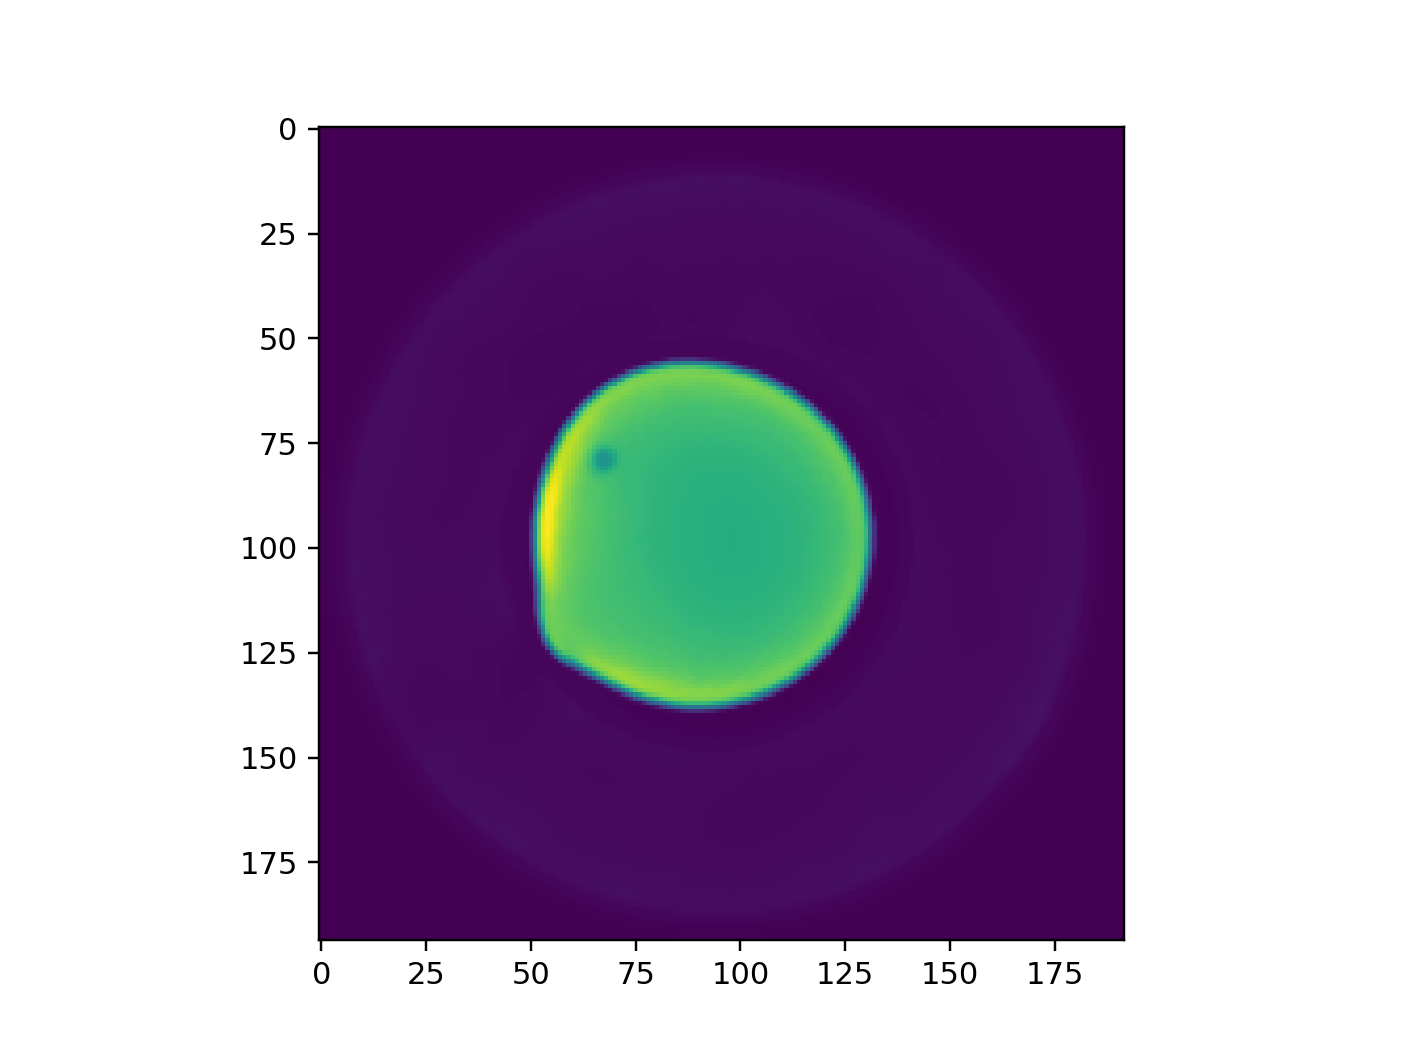

In [4]:
plt.figure(0)
plt.imshow(data_2d_1)
plt.figure(1)
plt.imshow(data_2d_2)

In [5]:
center_1 = (79, 93)
center_2 = (91, 97)
angle_range = None
radius = 45
o_profile_1 = CalculateRadialProfile(data=data_2d_1)
o_profile_1.add_params(center=center_1, radius=radius, angle_range=angle_range)
o_profile_1.calculate()
o_profile_2 = CalculateRadialProfile(data=data_2d_2)
o_profile_2.add_params(center=center_2, radius=radius, angle_range=angle_range)
o_profile_2.calculate()

<IPython.core.display.Javascript object>


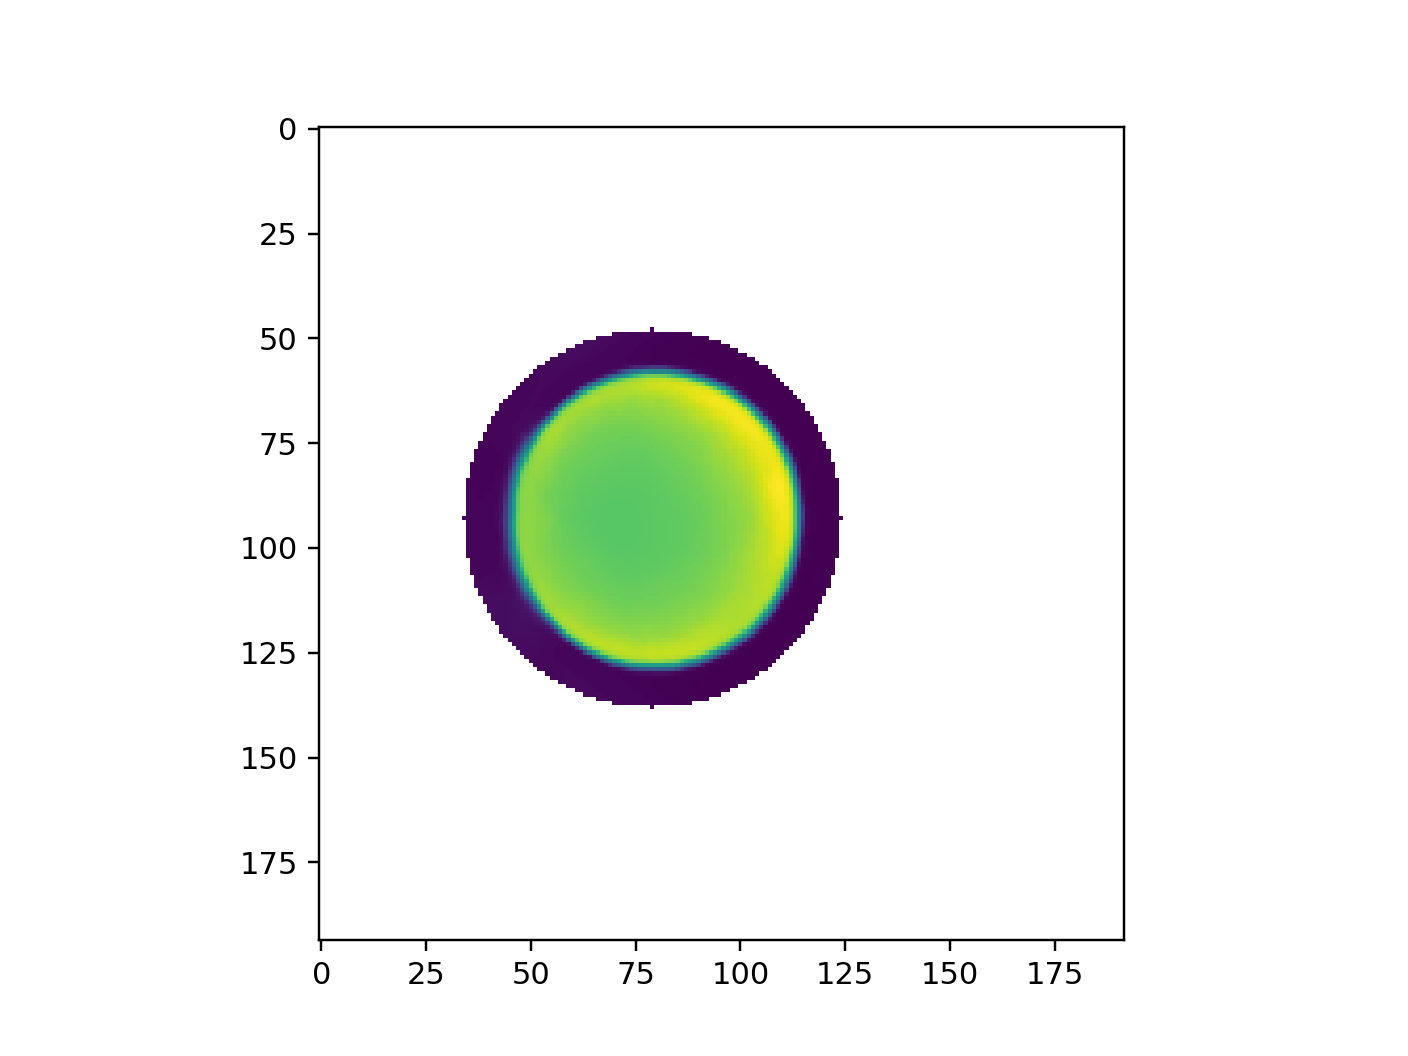

<IPython.core.display.Javascript object>


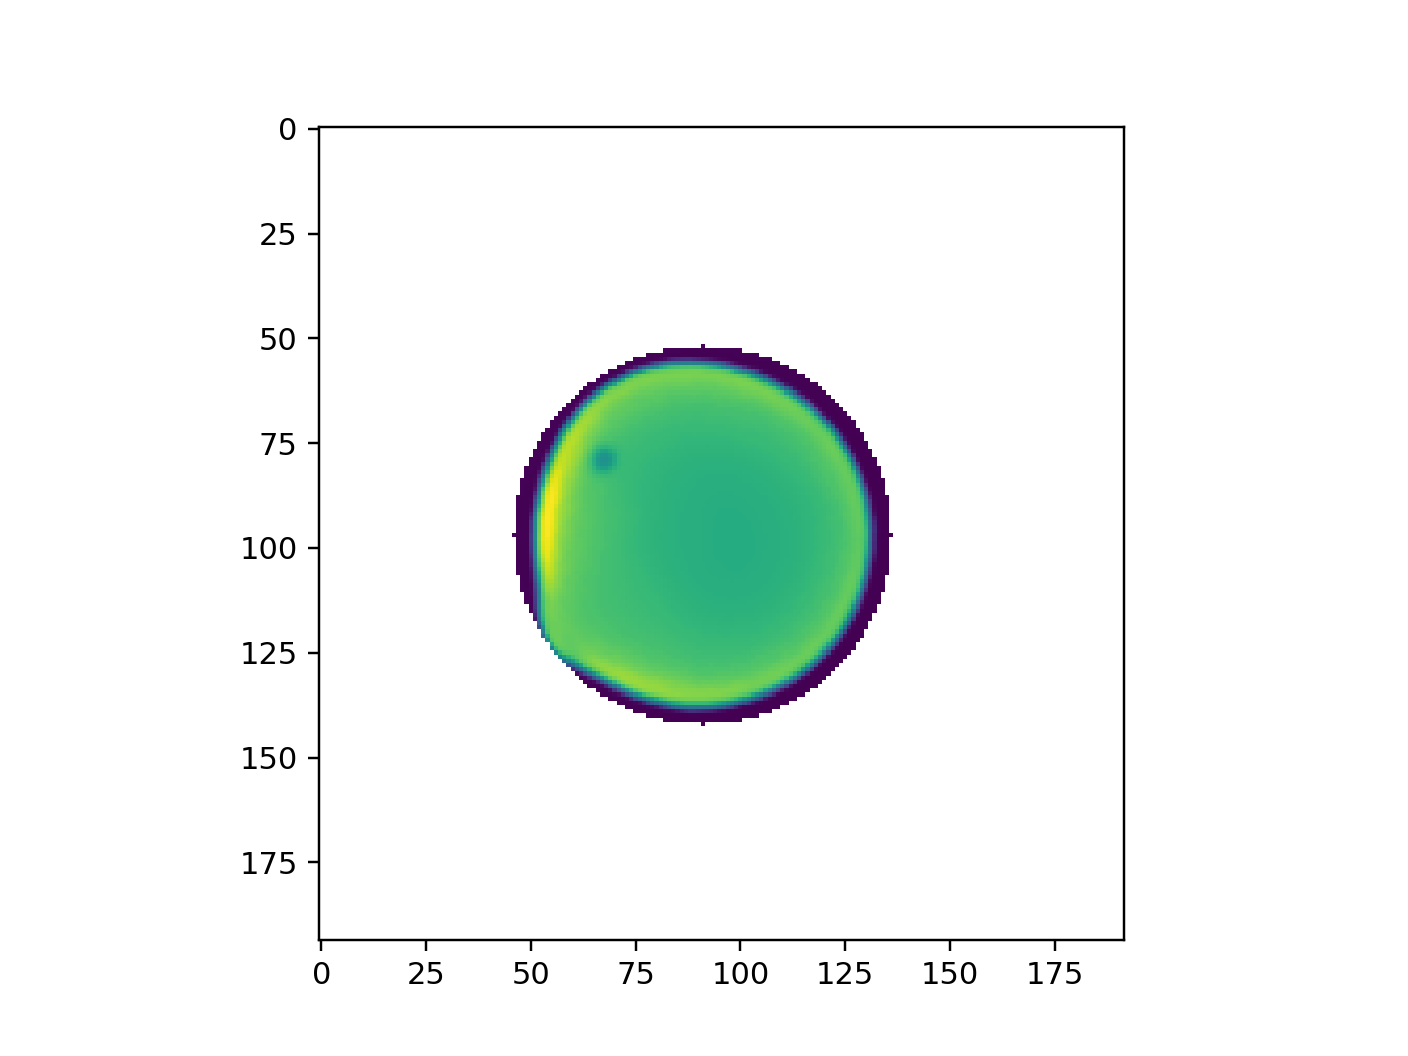

In [6]:
plt.figure(2)
plt.imshow(o_profile_1.working_data)
plt.figure(3)
plt.imshow(o_profile_2.working_data)

<IPython.core.display.Javascript object>


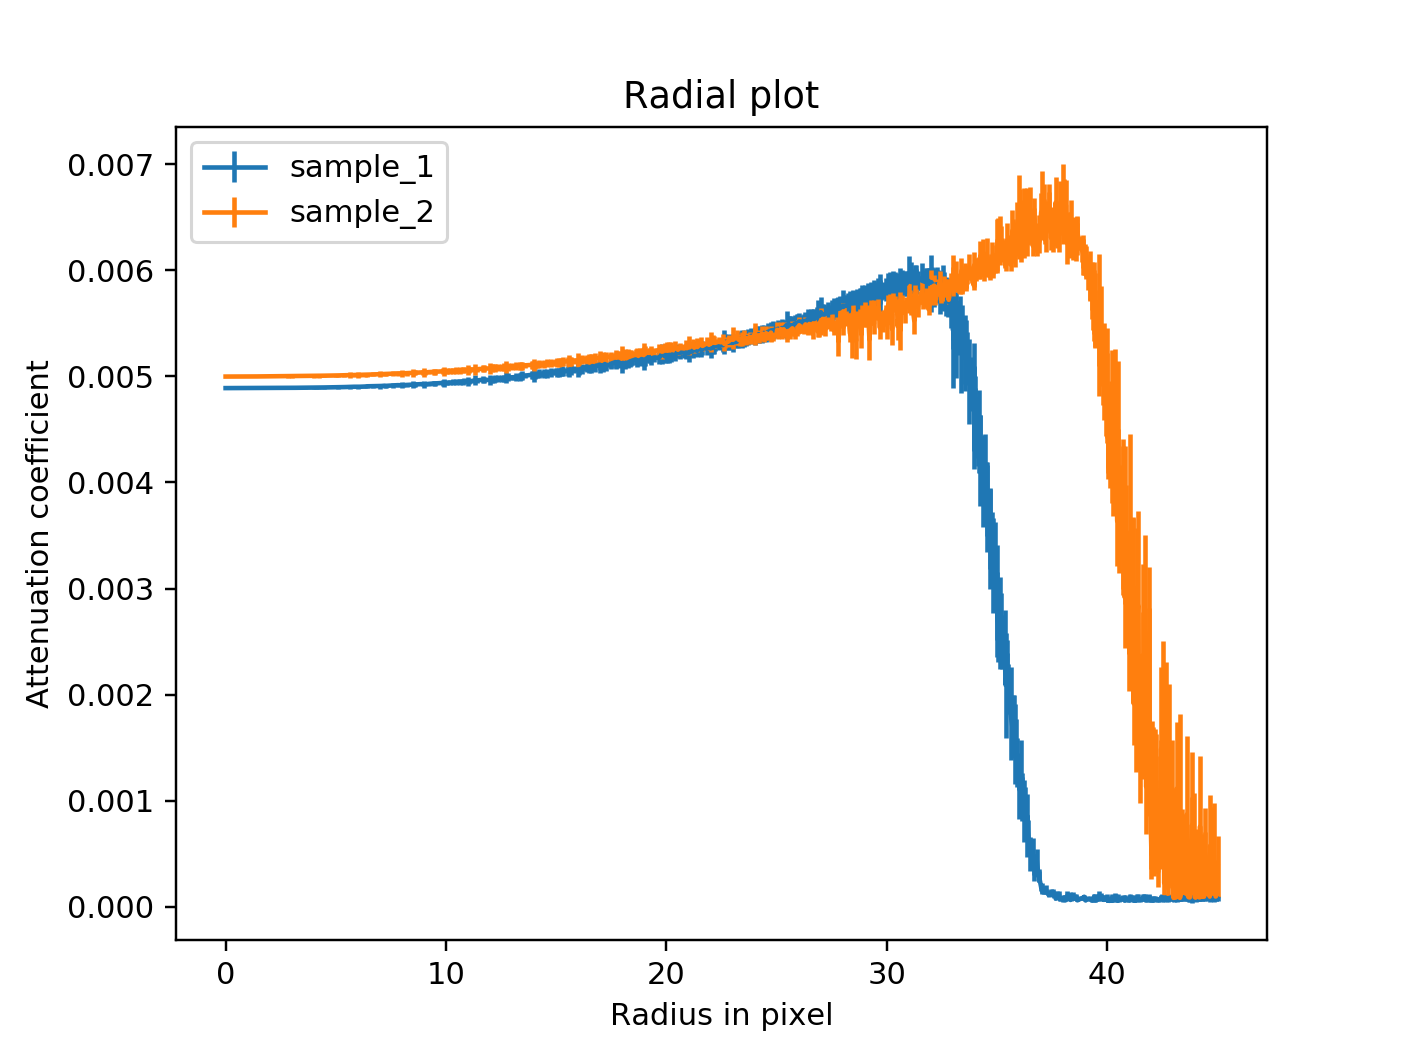

In [7]:
df1 = o_profile_1.radial_profile
df2 = o_profile_2.radial_profile
plt.figure(5)
plt.errorbar(x=df1.index, y=df1['mean'], yerr=df1['sem'], label='sample_1')
plt.errorbar(x=df2.index, y=df2['mean'], yerr=df2['sem'], label='sample_2')
plt.xlabel('Radius in pixel')
plt.ylabel('Attenuation coefficient')
plt.title('Radial plot')
plt.legend()